<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/T%C3%B3pico%2002%20-%20Aprendizado%20Supervisionado/05%20-%20%20RNA/Topico_02_Aprendizado_Supervisionado_Perceptron-Solu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron

Neste notebook, implementaremos o Perceptron, um modelo simples de neurônio artificial criado em 1958 por Frank Rosenblatt. Ele é capaz de classificar exemplos em duas classes e usa pesos e bias para calcular a saída final. O ajuste dos pesos e bias é dado com base nos erros de classificação em cada iteração.

O Perceptron é base para desenvolvimento de modelos mais sofisticados como o Multilayer Perceptron (MLP) e o Convolutional Neural Network (CNN). Portanto, o estudo do Perceptron é fundamental para entender as redes neurais em geral, bem como as possibilidades e limitações que elas apresentam.

É importante ressaltar que este notebook é complementar aos slides de sala de aula, os quais apresentam a teoria detalhada do Perceptron.

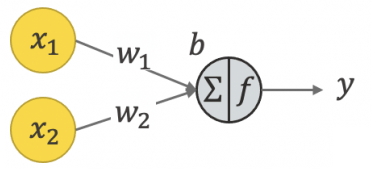

In [2]:
import numpy as np

def activation(x):
  return np.where(x >= 0, 1, 0)

def predict(X,weights,bias):
      z = np.dot(X, weights) + bias
      return activation(z)

def fit(X, y, learning_rate=0.001, epochs=100):
      n_features = X.shape[1]

      # Inicialização dos pesos
      weights = weights = np.random.rand(n_features)
      bias = 0

      # Iteração por epocas
      for epoch in range(epochs):
          # iteração entre as amostras
          for i in range(len(X)):
              z = np.dot(X, weights) + bias # Produto escalar e bias
              y_pred = activation(z) #Função de ativação
              loss = (y[i] - y_pred[i]) #calculo da perda

              #Atualização dos pesos com base no erro
              weights = weights + learning_rate * loss * X[i]
              bias = bias + learning_rate * loss

      #Calculo de performance da epoca
      y_pred = predict(X,weights,bias)
      acc = 1 - np.sum(np.abs(y_pred-y))/len(X)
      print(f'acc training after epcoch {epoch}: {acc}')
      return weights, bias

Vamos testar um perceptron para determinar quando um aluno passa por média ou reprova (1) e reprovados (0).

Neste caso hipotético, criamos um dataset que representa 3 notas de um aluno, sendo a classe 1 para aqueles que atingiram média e 0 para os reprovados



In [11]:
X = np.array([[7, 9, 7],
              [3, 7, 3],
              [10, 10, 10],
              [8, 5, 10],
              [4, 5, 7],
              [4, 9, 2],
              [7, 6, 8],
              [3, 5, 5]])

y = np.array([1,
              0,
              1,
              1,
              0,
              0,
              1,
              0])

w,b = fit(X, y,
          learning_rate=0.001,
          epochs=400)

acc training after epcoch 399: 1.0


Vamos testar alguns exemplos de médias para ver como o modelos se comporta!

In [12]:
resp = predict([3,3,1],w,b)
print(resp)

0


Vamos visualizar as distruibuições das notas para verificar o que pode estar acontendo?

*   Poucos dados = Overfitting/UnderFitting
*   Drift na Distribuição (Treino != Teste)



In [13]:
import plotly.graph_objs as go
import plotly.express as px

# Criar o gráfico 3D com Plotly, colorindo por y_new
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y.astype(str))

# Configurar os rótulos dos eixos
fig.update_layout(scene=dict(
    xaxis_title='Eixo X',
    yaxis_title='Eixo Y',
    zaxis_title='Eixo Z'
))

# Mostrar o gráfico interativo
fig.show()


E com um dataset mais robusto. Vamos criar uma rotina para determinar aleatóriamente notas. Vamos analisar diferentes montantes, ok?

In [43]:
#criar rotina
import random
from sklearn.model_selection import train_test_split

np.random.seed(42)

n_samples = 50
X1 = np.random.randint(8, 11, (n_samples, 3))
X2 = np.random.randint(5, 11, (n_samples, 3))
X3 = np.random.randint(4, 11, (n_samples, 3))
X4 = np.random.randint(4, 7, (n_samples, 3))
X5 = np.random.randint(3, 9, (n_samples, 3))
X6 = np.random.randint(3, 11, (n_samples, 3))
X7 = np.random.randint(3, 11, (n_samples, 3))


# Concatenar todos os conjuntos em um único array
X = np.concatenate((X1, X2, X3, X4, X5, X6, X7), axis=0)

# Embaralhar os índices
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Aplicar os índices embaralhados para X_new e y_new
X = X[indices]


# Calcular y com base na condição média >= 7
y = np.array([1 if np.mean(x) >= 7 else 0 for x in X])


print(np.unique(y,return_counts=True))
# Exibir os primeiros exemplos e suas respectivas classes
for i in range(20):
    print(f"Amostra: {X[i]}, Classe: {y[i]}")

#split do dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

#treino
w,b = fit(X_train, y_train,
          learning_rate=0.001,
          epochs=5)

(array([0, 1]), array([199, 151]))
Amostra: [10  9  8], Classe: 1
Amostra: [5 4 6], Classe: 0
Amostra: [ 7 10  4], Classe: 1
Amostra: [5 5 3], Classe: 0
Amostra: [8 4 3], Classe: 0
Amostra: [5 4 4], Classe: 0
Amostra: [10  5  5], Classe: 0
Amostra: [4 4 7], Classe: 0
Amostra: [ 9 10  9], Classe: 1
Amostra: [4 6 4], Classe: 0
Amostra: [8 7 5], Classe: 0
Amostra: [5 6 4], Classe: 0
Amostra: [8 3 3], Classe: 0
Amostra: [10  3  5], Classe: 0
Amostra: [4 6 7], Classe: 0
Amostra: [10  8  8], Classe: 1
Amostra: [8 7 5], Classe: 0
Amostra: [9 9 9], Classe: 1
Amostra: [ 6 10 10], Classe: 1
Amostra: [10  6  7], Classe: 1
(array([0, 1]), array([160, 120]))
(array([0, 1]), array([39, 31]))
acc training after epcoch 4: 0.85


In [41]:
from sklearn.metrics import accuracy_score
#test (predict)
y_pred = predict(X_test,w,b)
print(y_pred)
print(y_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

[1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0]
[0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0

In [42]:
#visualização dos dados
import plotly.graph_objs as go
import plotly.express as px
import plotly.subplots as sp

# Criar gráficos 3D com Plotly
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Treinamento', 'Teste'),
                       specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# Gráfico 3D para o conjunto de treinamento
fig.add_trace(
    go.Scatter3d(
        x=X_train[:, 0],
        y=X_train[:, 1],
        z=X_train[:, 2],
        mode='markers',
        marker=dict(size=5, color=y_train, colorscale='Viridis', colorbar=dict(title='Classe')),
        name='Treinamento'
    ),
    row=1, col=1
)

# Gráfico 3D para o conjunto de teste
fig.add_trace(
    go.Scatter3d(
        x=X_test[:, 0],
        y=X_test[:, 1],
        z=X_test[:, 2],
        mode='markers',
        marker=dict(size=5, color=y_test, colorscale='Viridis', colorbar=dict(title='Classe')),
        name='Teste'
    ),
    row=1, col=2
)

# Configurar os rótulos dos eixos e a perspectiva da câmera
fig.update_layout(
    scene1=dict(
        xaxis_title='Eixo X',
        yaxis_title='Eixo Y',
        zaxis_title='Eixo Z',
        camera=dict(
            eye=dict(x=1.25, y=1.25, z=1.25)
        )
    ),
    scene2=dict(
        xaxis_title='Eixo X',
        yaxis_title='Eixo Y',
        zaxis_title='Eixo Z',
        camera=dict(
            eye=dict(x=1.25, y=1.25, z=1.25)
        )
    ),
    title='Distribuição dos Dados de Treinamento e Teste'
)

# Mostrar o gráfico interativo
fig.show()

Porque precisamos embaralhar as amostras?

Vamos analisar o impacto no treino e discutir os resultados

E com um dataset real?

Iris Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_iris()
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y)


w,b = fit(X_train,y_train,learning_rate=0.001, epochs=100)

y_pred = predict(X_test,w,b)

print(classification_report(y_test,y_pred))